In [115]:
# Python 3.9.0
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from conversation_data.csv
df = pd.read_csv('conversation_data.csv')
df.head()

,conversation_id,user_id,user_email,usage_frequency,support_agent_id,started_at,closed_at,company_id,company_name,subscription_id,subscription_type,score_id,created_at,score
0,222e1a4e-3416-4795-8e40-05758b03403c,818,johnmayo@example.com,38,1740,2023-01-02 18:18:41,2023-01-03 11:18:41,41,"Gonzalez, Hart and Gonzalez",3489e0da-c797-4532-bb01-b4688b0d8ec7,self-serve,289fdd09-d8e2-4c73-9b16-83ebd95ede52,2023-01-02 18:18:41,4
1,c298124f-0107-4794-9b3e-98a8f5eba994,130,stephanie37@example.com,40,1401,2023-05-17 09:59:38,2023-05-19 14:59:38,14,Graham-Jackson,f4989a14-c9b7-4471-8668-8e2595572d69,self-serve,ec9e1404-d2a8-4149-9a72-1705d6c84f19,2023-05-17 09:59:38,3
2,29a29dbd-08f0-4d76-9da4-7c8cb6e1ffb8,548,grayjohn@example.org,11,1818,2023-06-25 21:25:37,2023-06-27 22:25:37,16,"Roberson, Curtis and Vargas",955dc519-97cf-41b2-8b68-209a274ba7a0,free,355194c2-caab-4502-af4a-0805c0e1bb30,2023-06-25 21:25:37,5
3,fadfdb84-efe5-4841-9690-ff6a5ec1ba0c,577,riceteresa@example.org,68,1777,2023-05-26 10:56:41,2023-05-26 11:56:41,29,Lee-French,a3e0fd92-2244-43cc-8351-6788054b2eb6,self-serve,3b0db4bc-37b8-4842-818b-cede875d361e,2023-05-26 10:56:41,2
4,d452eb55-d780-4f48-9915-4f7fa0beedd4,875,freed@example.org,15,1205,2023-02-03 10:56:18,2023-02-04 00:56:18,5,Ramsey-Chan,b4124a9b-426b-4f92-8dc3-cfac60edb789,self-serve,2c9a4061-1149-4e68-8c84-9f482657ac10,2023-02-03 10:56:18,5


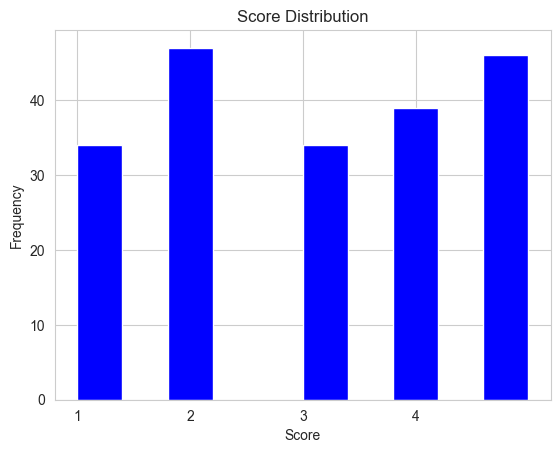

In [116]:
# Create a bar chart using column score from the dataframe
plt.hist(df['score'], bins=10, color='blue')
plt.title('Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xticks(np.arange(1, 5, 1))
plt.show()

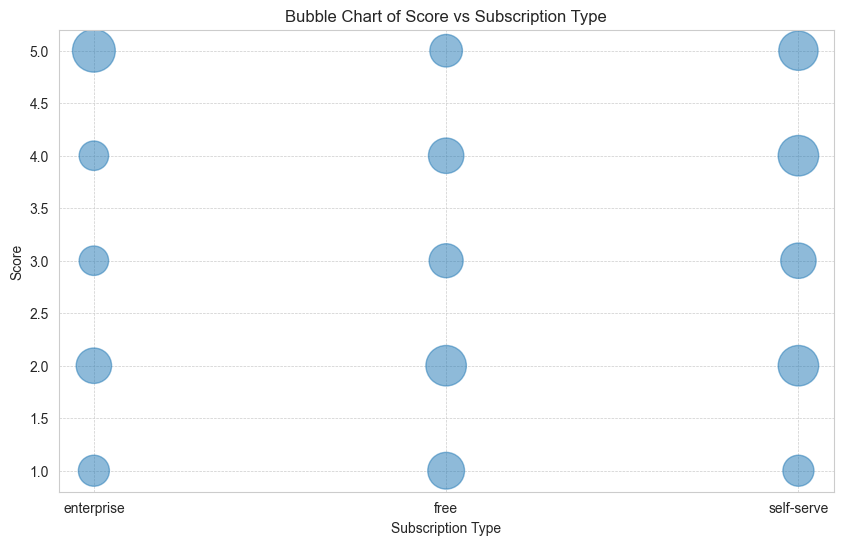

In [117]:
# Create bubble chart with score on the y axis subscruption_type on the x axis and number of users as the size of the bubble using the dataframe
grouped_df = df.groupby(['subscription_type', 'score']).size().reset_index(name='number_of_users')
grouped_df.head()

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bubble chart
plt.scatter(grouped_df['subscription_type'], grouped_df['score'], s=grouped_df['number_of_users']*50, alpha=0.5)

# Set the labels and title
plt.xlabel('Subscription Type')
plt.ylabel('Score')
plt.title('Bubble Chart of Score vs Subscription Type')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()


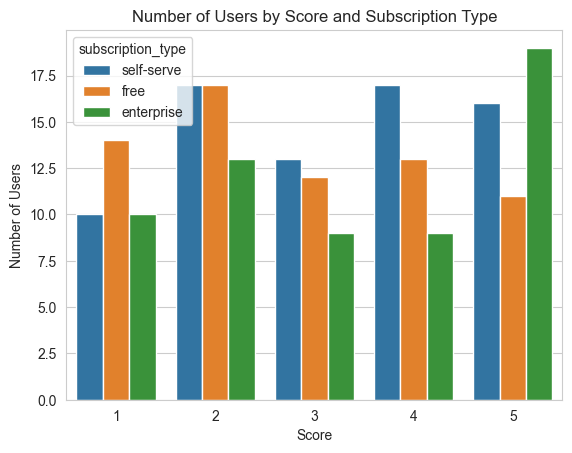

In [118]:
# Create a grouped bar chart with the score on the x axis and the number of users on the y axis grouped by the subscription type
sns.countplot(data = df, x = 'score', hue = 'subscription_type')
plt.xlabel('Score')
plt.ylabel('Number of Users')
plt.title('Number of Users by Score and Subscription Type');


<AxesSubplot: ylabel='company_name'>

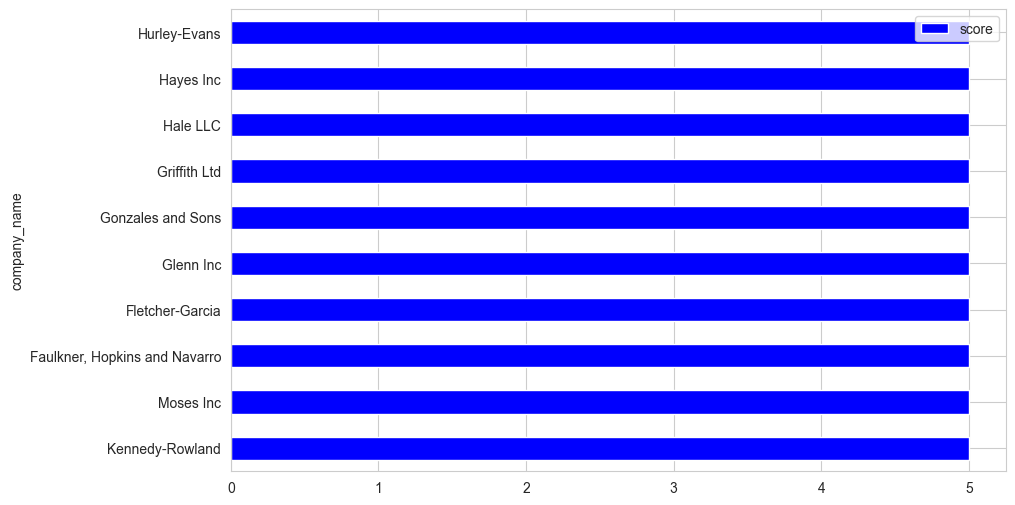

In [119]:
# Create a vertical bar chart with companies on the y axis and their average score on the x axis from the dataframe
# create a new datafroame grouping the companies and calculating the average score for each company
company_score = pd.DataFrame(df.groupby('company_name')['score'].mean())
company_score = company_score.sort_values(by='score', ascending=False)
company_score.head(10).plot(kind='barh', figsize=(10, 6), color='blue')

<AxesSubplot: ylabel='support_agent_id'>

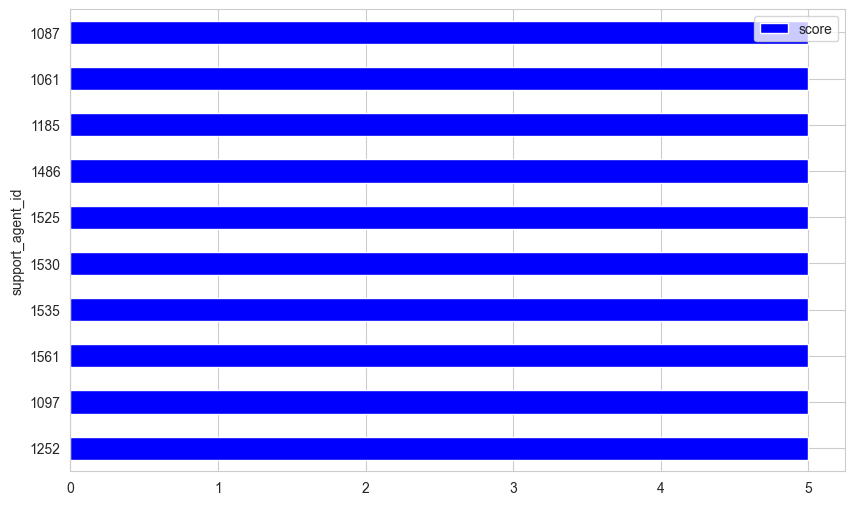

In [120]:
# Create a bar chart based on the average score for each support agent
# Group df by support agent and calculate average score
agent_score_group = pd.DataFrame(df.groupby('support_agent_id')['score'].mean())
# Order it descendingly by score
agent_score_group = agent_group.sort_values(by='score', ascending=False)
agent_score_group.head()
# Create a vertical bar chart 
agent_score_group.head(10).plot(kind='barh', figsize=(10, 6), color='blue')

In [121]:
# Convert the started_at and closed_at column to datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['closed_at'] = pd.to_datetime(df['closed_at'])
df['duration'] = df['closed_at'] - df['started_at']
# Convert the duration column to hours
df['duration'] = df['duration'].astype('timedelta64[h]')

# Group the dataframe by support_agent_id and calculate the mean of the duration column
agent_duration_group = df.groupby('support_agent_id').mean().reset_index()
# Sort the dataframe by the duration column
agent_duration_group = df.sort_values(by='duration', ascending=False).reset_index(drop=True)
# Print the dataframe
agent_duration_group

/var/folders/q5/129jvbqn7697cxyglg65t6gr0000gn/T/ipykernel_9154/3304633724.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agent_duration_group = df.groupby('support_agent_id').mean().reset_index()


,conversation_id,user_id,user_email,usage_frequency,support_agent_id,started_at,closed_at,company_id,company_name,subscription_id,subscription_type,score_id,created_at,score,duration
0,b80aedec-2605-4138-ace4-7559fa5e8050,486,timothy45@example.org,92,1742,2023-08-09 23:40:05,2023-08-12 23:40:05,43,"Newman, Matthews and Perez",af356e44-6692-4ff2-af81-5e32cf186c95,free,4f2ddad0-7a40-4815-857f-0d2adfc942b5,2023-08-09 23:40:05,3,72.0
1,f094d849-83da-4a7c-8fa7-0f4b035cb3a5,801,reyesmichael@example.org,95,1369,2023-04-06 08:25:24,2023-04-09 08:25:24,16,Buckley and Sons,95532255-2a87-45b9-9cd8-c299f87092f9,self-serve,355861c0-d324-4e37-b401-48d496b9ec64,2023-04-06 08:25:24,5,72.0
2,758703ca-b903-4335-844e-bf7e3fad7029,554,ecollins@example.com,45,1820,2023-05-06 12:49:41,2023-05-09 12:49:41,18,Kelly-Hahn,1ce5d4af-6577-4e5b-9e65-78b13c8cbab4,self-serve,16db12b5-1dac-474f-a93f-9f0be634b00f,2023-05-06 12:49:41,4,72.0
3,4a5a202f-17c0-41a8-bcfc-f4006826b2f0,378,ballardjack@example.org,1,1814,2023-02-20 19:19:37,2023-02-23 19:19:37,35,Gomez-Smith,dd613534-8549-49b4-ad75-a036ec6739c3,enterprise,6444a03e-a105-4cf2-8f78-d367d3a8aa46,2023-02-20 19:19:37,1,72.0
4,1e144b1f-0e8f-4d43-8dc7-b6ee2097bddf,278,xward@example.com,58,1853,2023-02-21 02:22:50,2023-02-24 02:22:50,2,"Lee, Hernandez and Burke",f7c82b96-0bc8-4ddd-93b4-2ecc290080ac,self-serve,132d125f-022d-4d98-a870-7bc61584f275,2023-02-21 02:22:50,3,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,15c213d1-648c-4c62-8617-1539546ad943,159,eduardo27@example.net,95,1834,2023-04-11 05:52:05,2023-04-11 07:52:05,46,Johnson and Sons,a4dccd0c-02d2-4d0c-9cb8-23be33f14218,free,ce143e26-f616-4fe0-bd7a-c6c94526313d,2023-04-11 05:52:05,3,2.0
196,78062c2a-f2ab-4cd3-ad3e-3ed5b982438d,564,csloan@example.org,3,1294,2023-06-04 01:44:59,2023-06-04 02:44:59,39,Montoya LLC,148f7256-f744-4e0d-af49-7c73d8e661b7,free,cead0e6f-c9eb-4961-a993-923c2ebd6392,2023-06-04 01:44:59,2,1.0
197,54933438-263b-4330-a19c-dd85968cdea8,858,reedzachary@example.com,69,1101,2023-04-06 21:11:04,2023-04-06 22:11:04,33,"Booth, Bautista and Johnson",fceee89b-7f98-474c-88c4-c037bec393c8,enterprise,c2640182-dbb2-4f52-bbd6-ad00d32e04d3,2023-04-06 21:11:04,2,1.0
198,00d481fc-cae0-4d6b-9a6b-ecf0e344ddf3,12,igreen@example.net,95,1173,2023-06-06 21:54:04,2023-06-06 22:54:04,36,"Hernandez, Moore and Gordon",34a62789-e049-438a-a8f9-1e47f7ed54dd,self-serve,061df77d-c2f0-4973-814c-522c5fdfef53,2023-06-06 21:54:04,4,1.0


<AxesSubplot: ylabel='support_agent_id'>

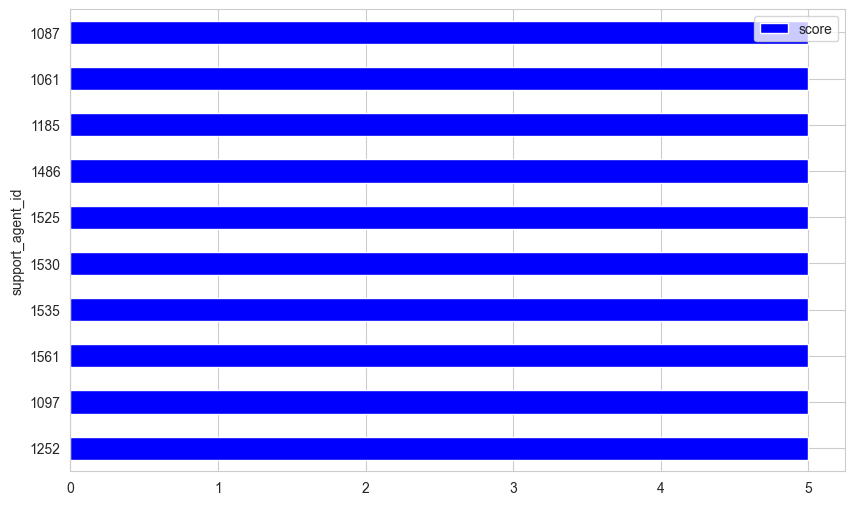

In [122]:
agent_score_group.head(10).plot(kind='barh', figsize=(10, 6), color='blue')

<AxesSubplot: xlabel='month,year'>

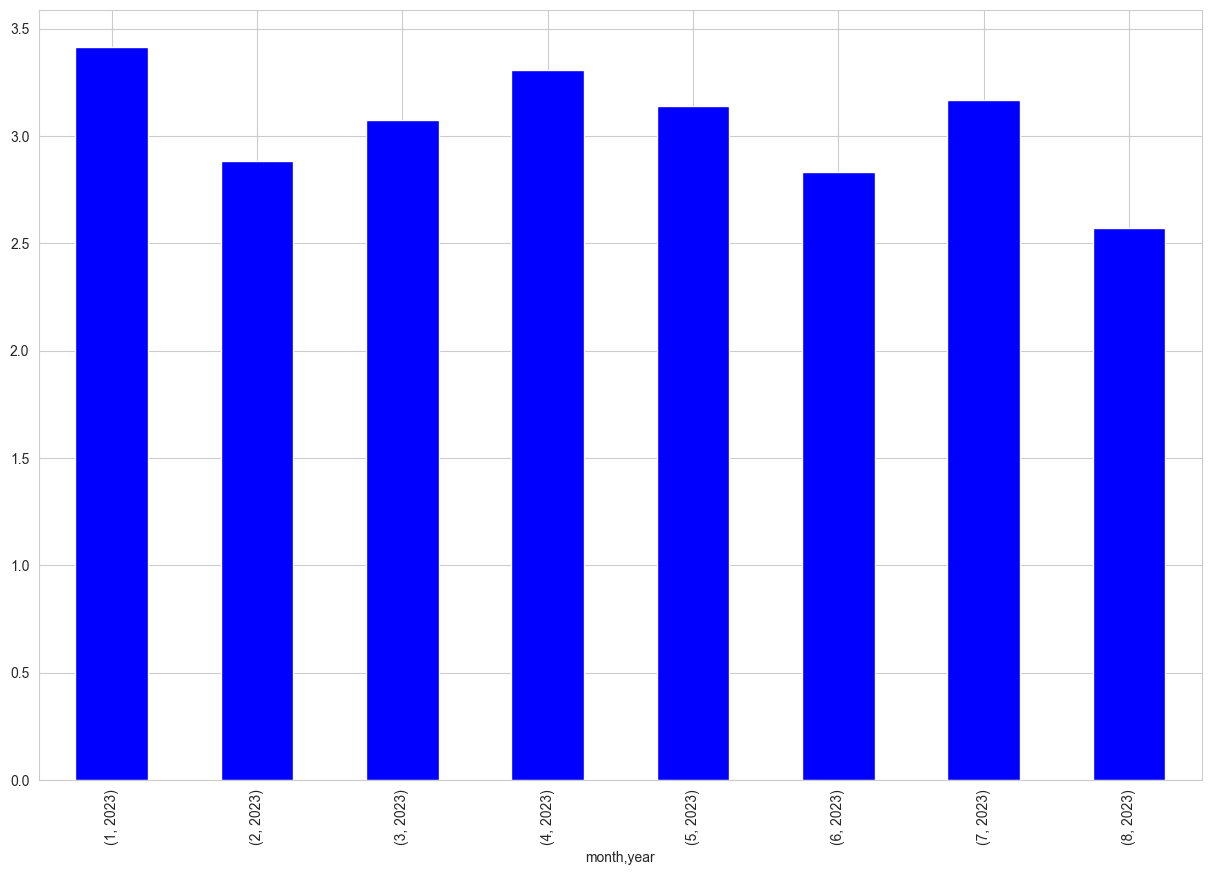

In [133]:
# group the created_at column by month and year
df['created_at'] = pd.to_datetime(df['created_at'])
df['month'] = df['created_at'].dt.month
df['year'] = df['created_at'].dt.year
df.head()

# group the created_at column by month and year and average the score column
date_score_group = df.groupby(['month', 'year'])['score'].mean()

# plot the average score per month and year
date_score_group.plot(kind='line', figsize=(15, 10), color='blue')